## 목차 ##
0. Basic Setup
1. 데이터 시각화 Quest
    이진변수 
    3변수 이상 

# Basic Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

주피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함

In [2]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 1. 데이터 시각화 Quest ##
주어진 데이터셋들을 자유롭게 활용하여
시각화 세션에서 배운 그래프 중 2개(이진변수, 3개 이상 변수)를 선택해 데이터를 시각화하고
시각화 결과에서 의미 도출해보기!

In [3]:
#데이터셋 불러오기 및 확인
df = pd.read_csv("./airbnb_listings.csv")
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

## 이진변수

In [5]:
import math     #로그 함수 사용을 위해 math 임포트

#침대 종류와 침대 수의 관계를 알고 싶다. 필요한 column만 추출
df_bed = df[['bed_type','beds']]
df_bed = df_bed.dropna(axis=0) 
df_bed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 0 to 3584
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bed_type  3576 non-null   object 
 1   beds      3576 non-null   float64
dtypes: float64(1), object(1)
memory usage: 83.8+ KB


In [6]:
#침대 종류 당 침대 수 확인
print(df_bed.groupby(['bed_type'])['beds'].count())

#침대 종류 당 침대 수가 편차가 크므로 상용로그 적용     bed_count_log10
bed_count_log10 = df_bed.groupby(['bed_type'])['beds'].count().apply(math.log10).to_frame().reset_index() 
print('\n', 'bed_count_log10\n', bed_count_log10, sep='')

#침대 종류 당 방내 평균 침대 수     bed_mean
bed_mean = df_bed.groupby(['bed_type'])['beds'].mean().to_frame().reset_index() 
print('\n', 'bed_mean\n', bed_mean, sep='')

#침대 종류 당 침대 수 표준편차      bed_std 
bed_std = df_bed.groupby(['bed_type'])['beds'].std().to_frame().reset_index()
print('\n','bed_std\n', bed_std, sep='') 

bed_type
Airbed             40
Couch              10
Futon              51
Pull-out Sofa      31
Real Bed         3444
Name: beds, dtype: int64

bed_count_log10
        bed_type      beds
0         Airbed  1.602060
1          Couch  1.000000
2          Futon  1.707570
3  Pull-out Sofa  1.491362
4       Real Bed  3.537063

bed_mean
        bed_type      beds
0         Airbed  1.100000
1          Couch  1.200000
2          Futon  1.156863
3  Pull-out Sofa  1.096774
4       Real Bed  1.627468

bed_std
        bed_type      beds
0         Airbed  0.378932
1          Couch  0.421637
2          Futon  0.418213
3  Pull-out Sofa  0.396219
4       Real Bed  1.023545


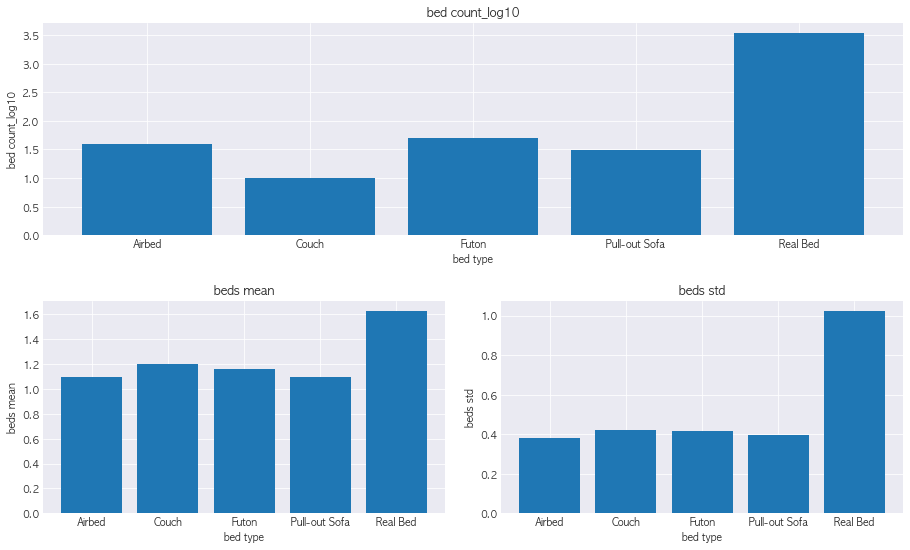

In [7]:
#막대 그래프 작성
plt.figure(figsize=(13,8))  #그래프 사이즈 지정

#침대 종류 당 개수(로그) 막대그래프
plt.subplot(2,1,1)
plt.title('bed count_log10')   
plt.xlabel('bed type')
plt.ylabel('bed count_log10')
plt.bar(bed_count_log10.bed_type,bed_count_log10.beds )

#침대 종류 당 방내 개수 평균 막대그래프
plt.subplot(2,2,3)
plt.title('beds mean')
plt.xlabel('bed type')
plt.ylabel('beds mean')
plt.bar(bed_mean.bed_type,bed_mean.beds )

#침대 종류 당 방내 개수 표준편차 막대그래프
plt.subplot(2,2,4)
plt.title('beds std')
plt.xlabel('bed type')
plt.ylabel('beds std')
plt.bar(bed_std.bed_type,bed_std.beds )
plt.tight_layout(pad=2.0)

## 결론 ##
침대 종류는 여러가지가 있으나, 일반 침대(Real Bed)가 대부분이었다. 
나머지 침대(요, 소파, 에어베드 등)는 아주 적은 수로 있었고, 있다 하더라도 대부분 1개씩 있는 것을 볼 수 있다.
일반 침대(Real Bed)는 개수가 다양하다.

## 삼변수 이상

In [8]:
#instant_bookable이 있는 도시 모으기
df.city = df.city.str.strip() #양쪽 공백으로 같은게 다르게 분류되는 경우 제거
df_t = df.groupby(['city','instant_bookable'])['country'].count().to_frame().reset_index()
instant_cities = list(df_t[df_t['instant_bookable'] == 't'].sort_values(by='country').city)
instant_cities

['Brookline',
 'Charlestown',
 'East Boston',
 'Jamaica Plain, Boston',
 'Roslindale',
 'South Boston',
 'Watertown',
 'West Roxbury',
 'Allston',
 'Brighton',
 'Roxbury Crossing',
 'Jamaica Plain',
 'Cambridge',
 'Dorchester',
 'Somerville',
 'Boston']

In [9]:
#city, instant_bookable, price 세 변수의 관계를 알아보고 싶다.
df_CIP = df[['city','instant_bookable','price']]
df_CIP = df_CIP[df_CIP.city.isin(instant_cities)]
df_CIP = df_CIP.dropna(axis=0) #결측치 제거
df_CIP.info()

#데이터 조작에 필요한 함수
def tf_to_bin(str):
    if str == 'f':
        return 0
    else: return 1

def delcom(str):
    return str.replace(',','')

#instant_bookable을 바이너리 값으로 변환
df_CIP.instant_bookable = df_CIP.instant_bookable.apply(tf_to_bin)

#price를 float type으로 변환
df_CIP.price = df_CIP.price.str[1:].apply(delcom).apply(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3556 entries, 0 to 3584
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              3556 non-null   object
 1   instant_bookable  3556 non-null   object
 2   price             3556 non-null   object
dtypes: object(3)
memory usage: 111.1+ KB


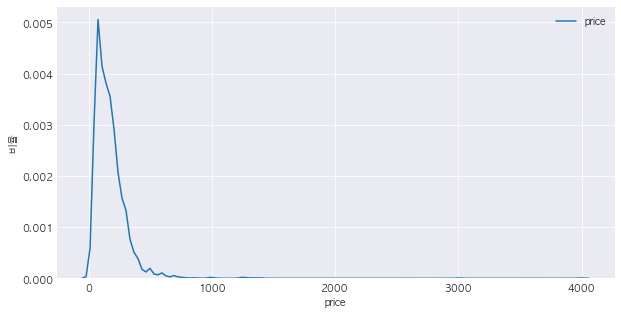

In [10]:
# kdeplot - price outlier 확인
# 빈 캔버스 사이즈 지정
plt.figure(figsize=(10,5))

# 캔버스에 그림 그리기
kde=sns.kdeplot(df_CIP['price']) 
kde.set_xlabel("price")
kde.set_ylabel("비율")

# 결과 캔버스 보여주기
plt.show() 

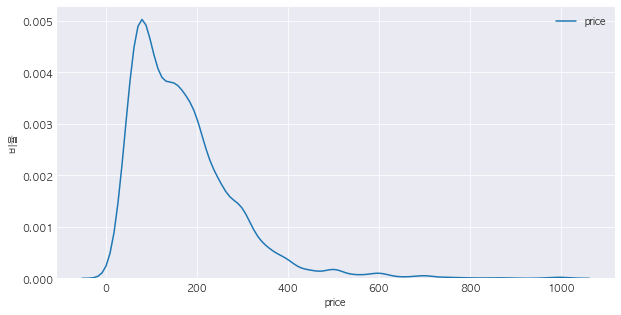

In [11]:
#price에 너무 큰 outlier가 있으니 1000보다 큰 아웃라이어 제거하고 다시 kdeplot확인
df_CIP = df_CIP[df_CIP.price<=1000]
plt.figure(figsize=(10,5))

# 캔버스에 그림 그리기
kde=sns.kdeplot(df_CIP['price']) 
kde.set_xlabel("price")
kde.set_ylabel("비율")

# 결과 캔버스 보여주기
plt.show() 

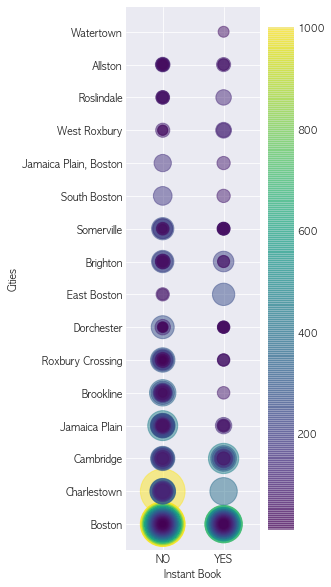

In [12]:
df_CIP = df_CIP.sort_values(by='price', ascending=False)
plt.figure(figsize=(3,10))
plt.xlim(-0.6,1.6)
plt.xticks([0,1],['NO', 'YES'])
plt.scatter(df_CIP['instant_bookable'], # x축
            df_CIP['city'], # y축
            c=df_CIP['price'],
            s=2*df_CIP['price'], # 색이랑 사이즈로 같이 가격 표현
            # 10을 곱한 이유는 그래프 사이즈에 맞게 원의 지름을 키워주기 위함
            alpha=0.5, # 투명도
            cmap='viridis') # 컬러바 종류
plt.colorbar()
plt.ylabel('Cities')
plt.xlabel('Instant Book')
# plt.xticks(rotation=90) # x축에 종류가 많으면 label 돌려주기
plt.show()

## 결론 ##
1. 원의 크기와 색상을 통해 Boston, Cambridge, Charlestown 등의 도시가 다른 도시에 비해 가격이 비싼 것을 확인할 수 있음
2. 반투명한 원들이 모여있으므로, 원의 불투명도를 통해 각 도시들의 에어비앤비 숙소 수를 직관적으로 파악 가능
    -> South Boston, Watertwon, East Boston 등은 숙소 수가 눈에 띄게 적음을 알 수 있음
3. Instant Book이 가능한 것과 가격 수준은 관련이 있어보임. 전반적으로 Instant book이 안되는 곳이 가격이 높아보임
4. 전반적으로 Instant Book이 되는 곳보다 안되는 곳이 많은 것을 확인할 수 있음